In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [8]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

#rcparams
plt.rcParams.update({'font.size': 11})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 11}

In [9]:
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [16]:
import glob
rdir = '/gpfs/data/greenocean/software/runs/'
trun = 'TOM12_TJ_T001'
yr = 2000
w = glob.glob(f'{rdir}{trun}/ORCA*{yr}*ptrc_T.nc')
t = nc.Dataset(w[0])
print(t)

OSError: [Errno -51] NetCDF: Unknown file format: b'/gpfs/data/greenocean/software/runs/TOM12_TJ_T001/ORCA2_1m_20000101_20001231_ptrc_T.nc'

In [12]:
tdir = '/gpfs/data/greenocean/software/products/MetOffice/withOzone/'
tfilmet = 'MetOffice_wind2020.nc'
MO = nc.Dataset(f'{tdir}{tfilmet}')
print('')
print(f'{tfilmet} file contents')
print(MO)
plin
print(MO['gphi'][0:37,0])


MetOffice_wind2020.nc file contents
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(182), y(149), time_counter(365)
    variables(dimensions): float32 glam(y,x), float32 gphi(y,x), float32 time_counter(time_counter), float64 uwind10m(time_counter,y,x), float64 vwind10m(time_counter,y,x)
    groups: 


NameError: name 'plin' is not defined

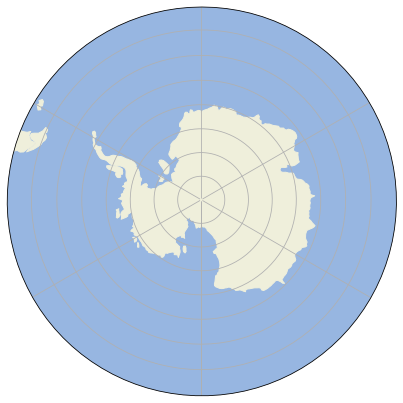

In [37]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

fact = 0.6
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

fig.subplots_adjust(bottom=0.05, top=0.95,left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

ax1.add_feature(cfeature.LAND, zorder = 0)
ax1.add_feature(cfeature.OCEAN)

ax1.gridlines()


# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)

plt.show()



In [134]:
import netCDF4 as nc
import mapfxn as mf
from importlib import reload
reload(mf)

help(mf.plot_southern)

tdirncep = '/gpfs/data/greenocean/software/products/NCEPForcingData/'
tfilncep = 'ncep_bulk_2020.nc'
print('')
print(f'{tfilncep} file contents')
NCEP = nc.Dataset(f'{tdirncep}{tfilncep}')
print(NCEP)

nlon = NCEP['nav_lon'][:]
nlat = NCEP['nav_lat'][:]
tdat = NCEP['wspd'][0,:,:]

Help on function plot_southern in module mapfxn:

plot_southern(ax1, lons, lats, tdat, tvmin, tvmax, intvl, northex=-50, fs=12, tit='', cbarlab='', tcmap='viridis')
    standard plotting code for a southern ocean quantity 
    non-default args:
    ax1 = the axis
    lons, lats, tdat, tvmin, tvmax, 
    intvl is interval for the contours
    default args:
    northex is the northern extent of the graph
    fs is fontsize, tit is title (default to none), 
    cbarlab is colorbarlabel (default to none)
    tcmap is colormap, default to viridis


ncep_bulk_2020.nc file contents
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(182), y(149), deptht(1), time_counter(366)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 deptht(y,x), float32 time_counter(time_counter), float32 air(time_counter,y,x), float32 pres(time_counter,y,x), float32 humidity(time_counter,y,x), float32 wspd(time_counter,

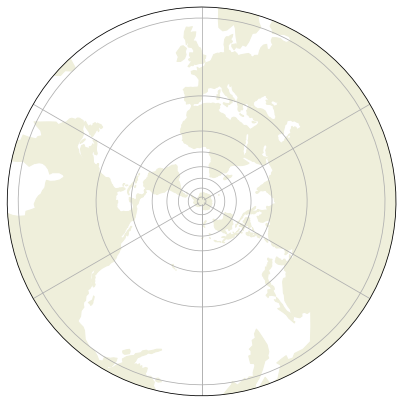

In [52]:
# #plt.pcolormesh(nlon, gridlats, temperature, transform=rotated_pole)


# import matplotlib.path as mpath
# import matplotlib.pyplot as plt
# import numpy as np

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature

# fact = 0.6
# fig = plt.figure(figsize=[10*fact, 10*fact])
# ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

# fig.subplots_adjust(bottom=0.05, top=0.95,left=0.04, right=0.95, wspace=0.02)

# # Limit the map to -60 degrees latitude and below.
# #ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())

# ax1.add_feature(cfeature.LAND, zorder = 0)
# #ax1.add_feature(cfeature.OCEAN)
# #ax1.pcolormesh(nlon,nlat,tdat, transform=ccrs.PlateCarree(), vmin = 0, vmax = 10)
# #plt.contourf

# plt.contourf(nlon, nlat, tdat, 60,
#              transform=ccrs.PlateCarree())
# ax1.gridlines()


# # Compute a circle in axes coordinates, which we can use as a boundary
# # for the map. We can pan/zoom as much as we like - the boundary will be
# # permanently circular.
# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)

# ax1.set_boundary(circle, transform=ax1.transAxes)

# plt.show()



In [49]:
print(np.min(nlat))

-78.19058


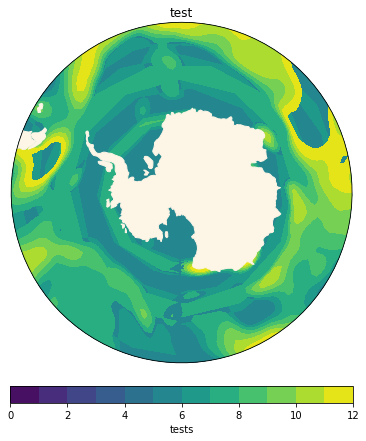

In [129]:

import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_southern(ax1, lons, lats, tdat, tvmin, 
                  tvmax, intvl, northex = -50, fs = 12, tit = '', cbarlab = '', tcmap = 'viridis'):
    ax1.set_extent([-180, 180, -90, northex], ccrs.PlateCarree())
    
    #make that circle
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax1.set_boundary(circle, transform=ax1.transAxes)
    
    #plot data according to given levels
    tlev = np.arange(tvmin,tvmax+intvl,intvl)
    mesh = ax1.contourf(lons, lats, tdat, tlev, cmap = tcmap, vmin = tvmin, vmax = tvmax,
                 transform=ccrs.PlateCarree())
    
    #plot land
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='oldlace'))
    ax1.set_title(tit, fontsize = fs)
    fig.colorbar(mesh, ax = ax1, orientation = 'horizontal',
                 pad = 0.06, fraction = 0.045, shrink = 0.9, label = cbarlab)
    plt.show()
    
fact = 0.7
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())    
plot_southern(ax1, nlon, nlat, tdat, 0, 12, 1, fs = 12, tit = 'test', cbarlab = 'tests')

In [21]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [76]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
import mapfxn as mf
from importlib import reload
reload(mf)


tdirncep = '/gpfs/data/greenocean/software/products/NCEPForcingData/'
tfilncep = 'ncep_bulk_2020.nc'
print('')
print(f'{tfilncep} file contents')
NCEP = nc.Dataset(f'{tdirncep}{tfilncep}')
print(NCEP)

nlon = NCEP['nav_lon'][:]
nlat = NCEP['nav_lat'][:]
tdat = NCEP['wspd'][0,:,:]


ncep_bulk_2020.nc file contents
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): x(182), y(149), deptht(1), time_counter(366)
    variables(dimensions): float32 nav_lon(y,x), float32 nav_lat(y,x), float32 deptht(y,x), float32 time_counter(time_counter), float32 air(time_counter,y,x), float32 pres(time_counter,y,x), float32 humidity(time_counter,y,x), float32 wspd(time_counter,y,x), float32 uwnd(time_counter,y,x), float32 vwnd(time_counter,y,x), float32 tcdc(time_counter,y,x), float32 prate(time_counter,y,x)
    groups: 


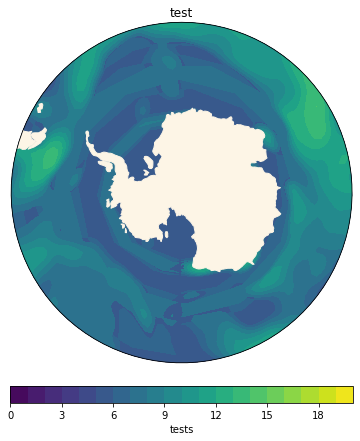

In [77]:
fact = 0.7
fig = plt.figure(figsize=[10*fact, 10*fact])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())  
mf.plot_southern(fig, ax1, nlon, nlat, tdat, 0, 20, 1, fs = 12, tit = 'test', cbarlab = 'tests')

In [44]:
basin= nc.Dataset('/gpfs/home/e415/data/masks/basin_masks.nc')
basin = nc.Dataset('/gpfs/data/greenocean/software/resources/ModelResources/BasinMasks/clq_basin_masks_ORCA.nc')

nav_lat = basin['Y'][:,:]
nav_lon = basin['X'][:,:]

ATL = basin['ATL'][:,:]; PAC = basin['PAC'][:,:]; IND = basin['IND'][:,:]
SO = basin['SO'][:,:]; ARCTIC = basin['ARCTIC'][:,:]; P1 = basin['P1'][:,:]
P2 = basin['P2'][:,:]; P3 = basin['P3'][:,:]; P4 = basin['P4'][:,:]
P5 = basin['P5'][:,:]; A1 = basin['A1'][:,:]; A2 = basin['A2'][:,:]
A3 = basin['A3'][:,:]; A4 = basin['A4'][:,:]; A5 = basin['A5'][:,:]
I3 = basin['I3'][:,:]; I4 = basin['I4'][:,:]; I5 = basin['A5'][:,:]

msks = [ATL, PAC, IND, SO, ARCTIC, P1, P2, P3, P4, P5, A1, A2, A3, A4, A5, I3, I4, I5]
titles = ['ATL', 'PAC', 'IND', 'SO', 'ARCTIC', 'P1', 'P2', 'P3',
          'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']



In [56]:
np.max(ATL)

1.0

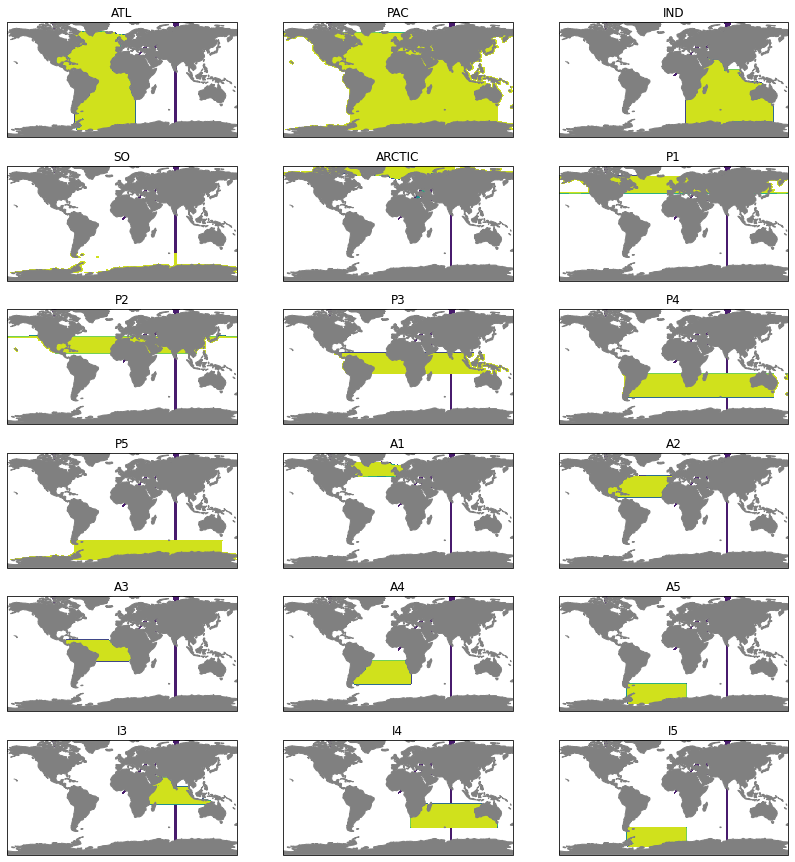

In [69]:
# fig, axs = plt.subplots(6,3, figsize=(20*fact, 22*fact), \
#                         facecolor='w', edgecolor='k', projection = ccrs.PlateCarree())
# axs = axs.ravel()

# axs[0].plot(np.arange(1,3,1), np.arange(1,3,1))
# ax1 = axs[0]
import cartopy.feature as cfeature

fig = plt.figure(figsize=[20*fact, 22*fact])

for i in range(1,19):
    ax1 = fig.add_subplot(6, 3, i, projection=ccrs.PlateCarree())


    ax1.set_extent([-170, 170, -90, 80], ccrs.PlateCarree())
    mesh = ax1.contourf(nav_lon, nav_lat, msks[i-1],
                 transform=ccrs.PlateCarree())
    ax1.set_title(titles[i-1])
    ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', 
                                                 edgecolor='face', facecolor='grey'))


In [65]:
ATL[0:10,0:10]

masked_array(
  data=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)